## p.343- seaborn을 활용한 시각화

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

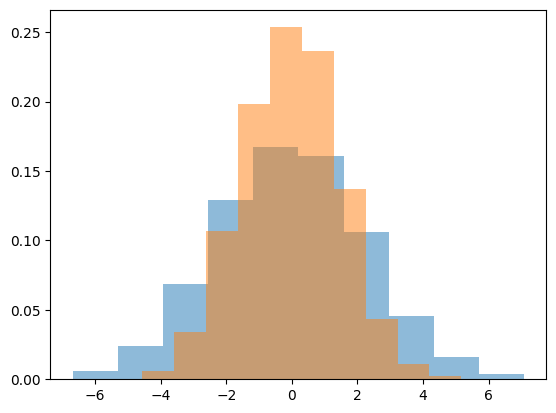

In [2]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data = pd.DataFrame(data,columns=['x','y'])
for col in 'xy': # 데이터프레임의 열 이름이 'x'와 'y'인 두 개의 열에 대해 반복
    plt.hist(data[col],density=True, alpha=0.5)

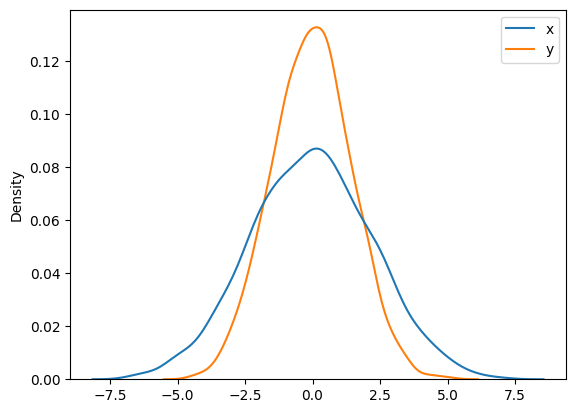

In [5]:
sns.kdeplot(data=data,fill=False);

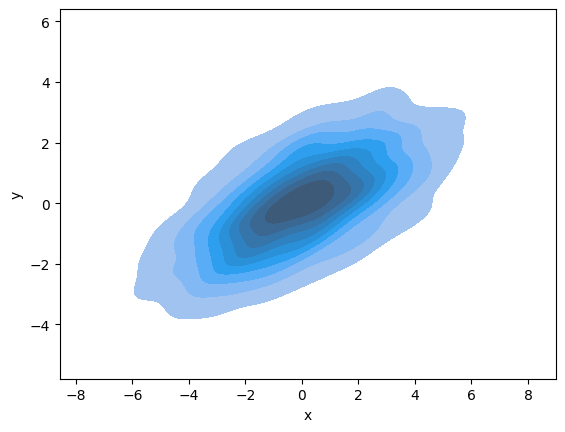

In [10]:
sns.kdeplot(data=data,x='x',y='y', fill=True); 
# kdeplot에 x,y를 주면 2차원으로 시각화

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


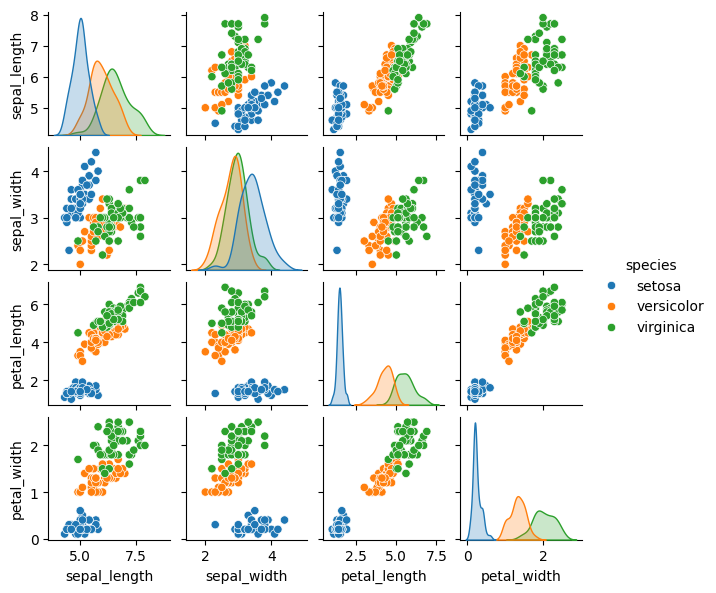

In [16]:
# 페어플롯 (pairplot) : 다차원 데이터에서 모든 쌍의 값을 플로팅 -> 상관관계 탐색
sns.pairplot(iris, hue='species', height=1.5);

In [17]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


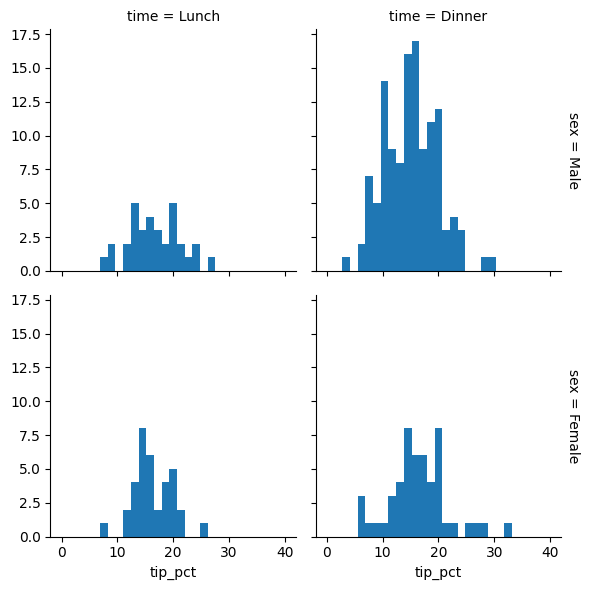

In [22]:
# 다면 히스토그램 (FacetGrid) : 부분 집합의 히스토그램 표현
tips['tip_pct'] = 100*tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips,row='sex',col='time',margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,30));

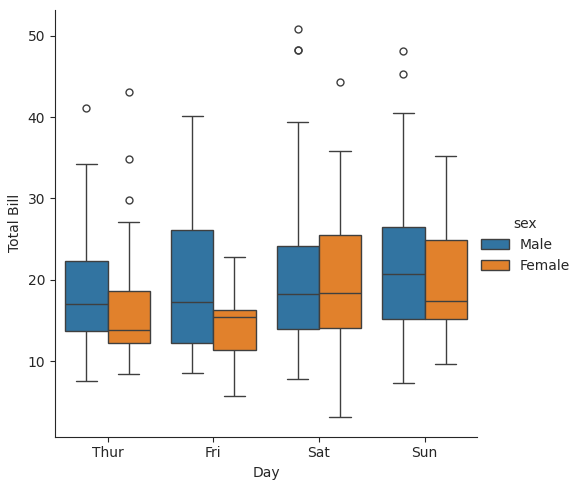

In [24]:
# 범주형 플롯 (catplot) : 다양한 불연속형 요인이 주어졌을 때 분포를 비교
with sns.axes_style(style="ticks"):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels('Day','Total Bill');

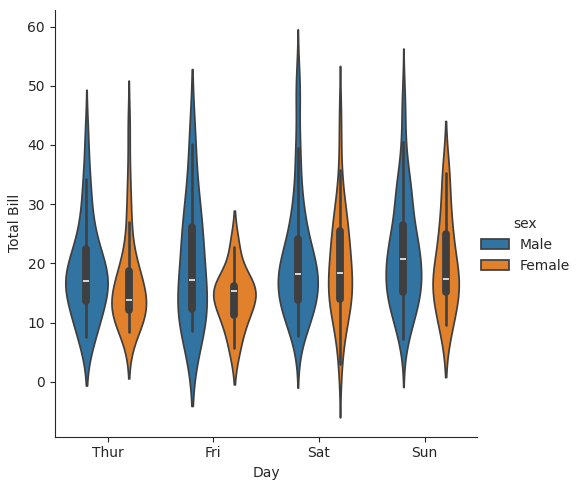

In [28]:
# kind='violin'도 많이 사용함
with sns.axes_style(style="ticks"):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='violin')
    g.set_axis_labels('Day','Total Bill');

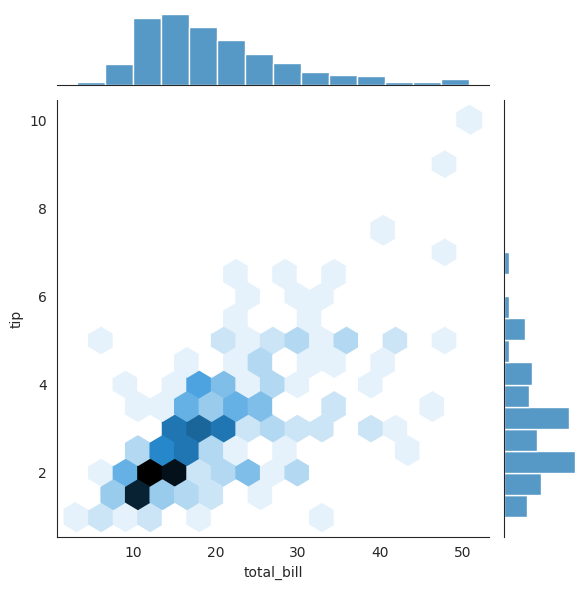

In [25]:
# 결합 분포 (jointplot) : 페어플롯과 유사, 주변분포와 함께 다양한 데이터시트 간의 결합분포 보여줌
# -> 두 변수의 값들이 어떻게 분포되어 있는지와 동시에 변수들 간의 관계를 파악
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

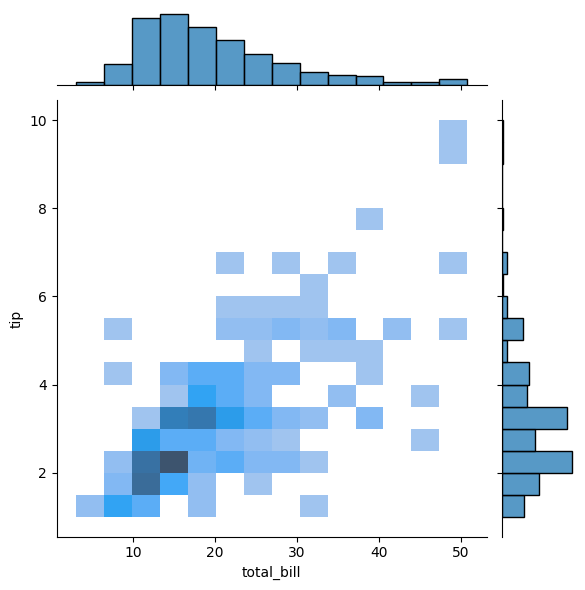

In [29]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hist');

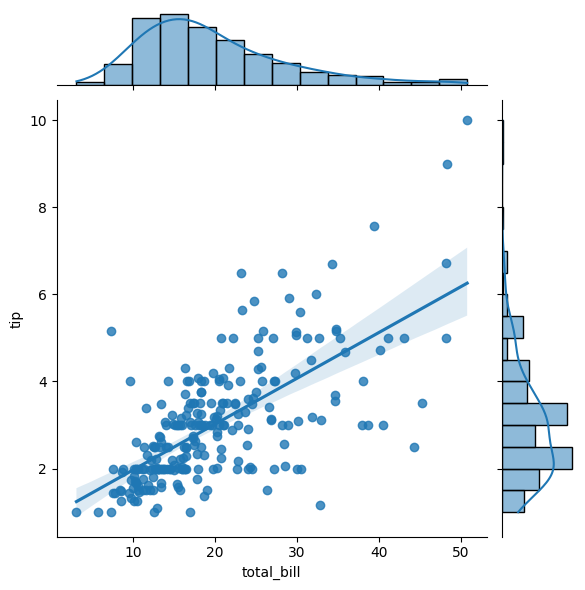

In [27]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');
# regression : 회귀분석 -> 예측

In [30]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


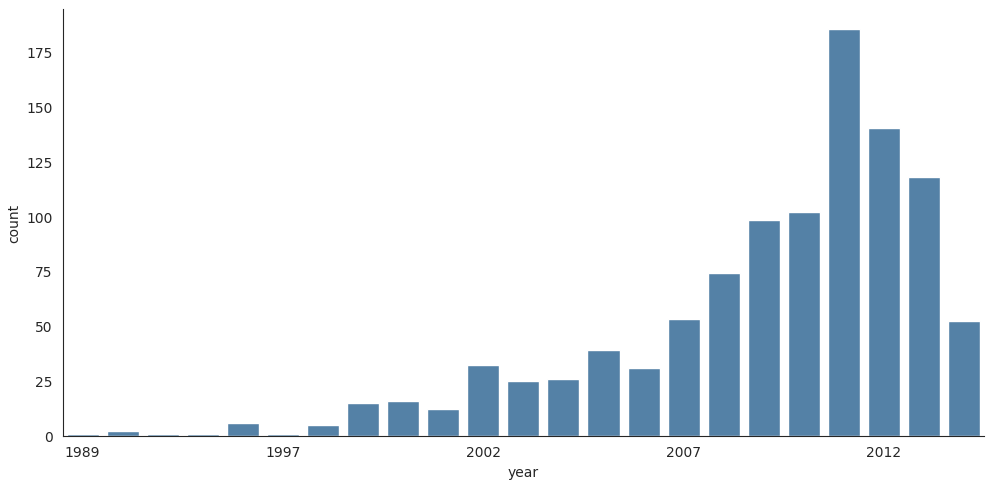

In [31]:
# 막대 플롯
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

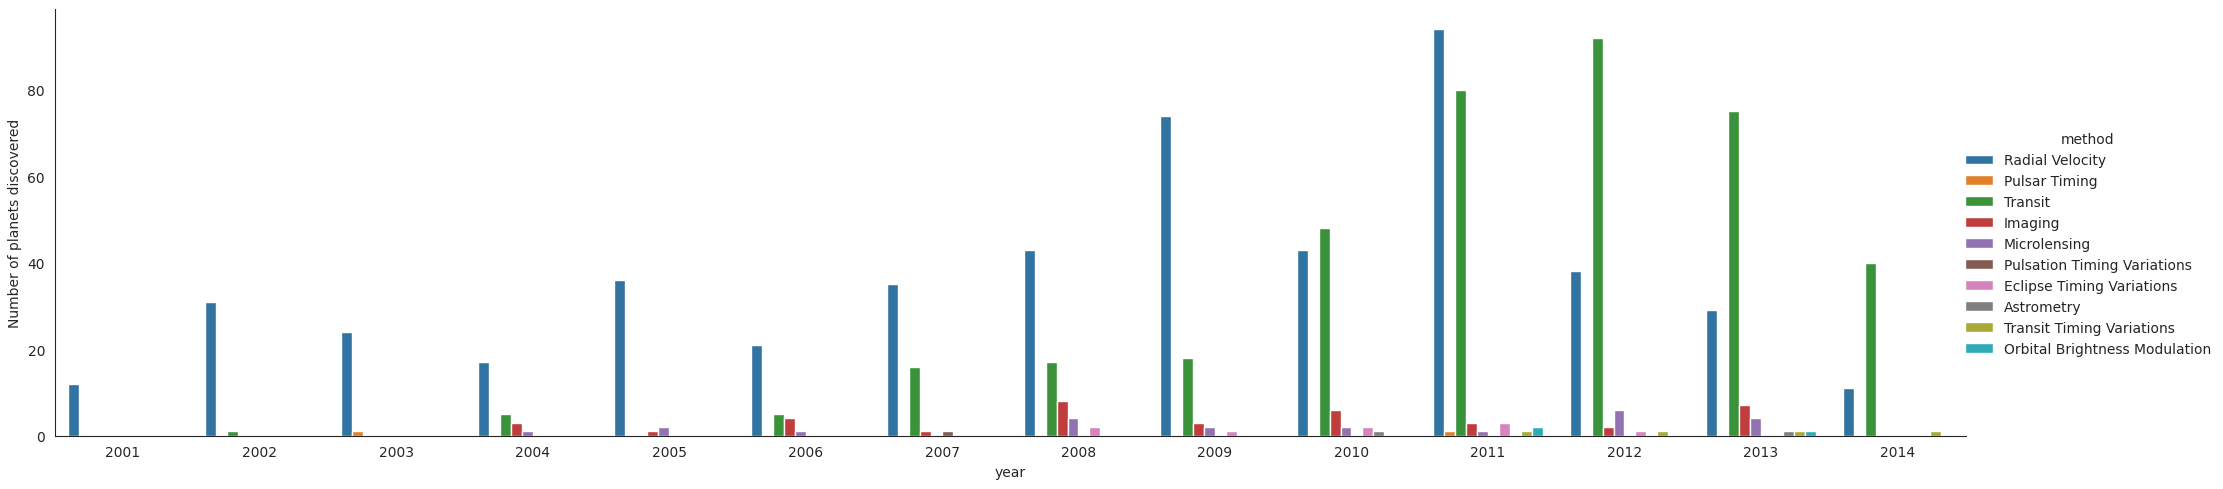

In [34]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4, kind='count', hue='method', order=range(2001,2015))
    g.set_ylabels("Number of planets discovered")

## p.352- 마라톤 완주시간 탐색

In [54]:
url = ('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [55]:
data = pd.read_csv(url)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [57]:
data.dtypes # pandas는 기본적으로 시간열을 object로 읽음 (-> string)

age        int64
gender    object
split     object
final     object
dtype: object

In [67]:
from datetime import timedelta
def convert_time(s):
    h,m,s = map(int,s.split(':'))
    return timedelta(hours=h,minutes=m, seconds=s)
convert_time('01:03:33')

datetime.timedelta(seconds=3813)

In [81]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                   converters={'split':convert_time,'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [82]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [83]:
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


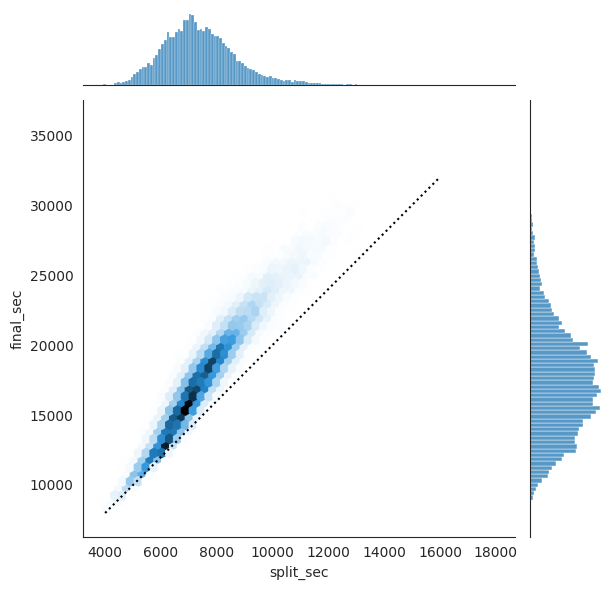

In [84]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind="hex")
    g.ax_joint.plot(np.linspace(4000,16000),
                   np.linspace(8000,32000),':k')

In [86]:
data['split_frac'] = 1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


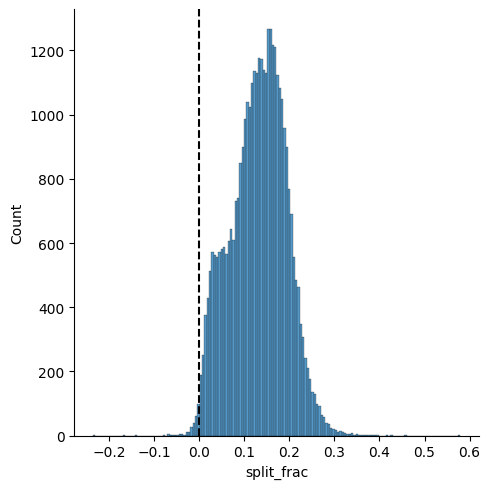

In [87]:
sns.displot(data['split_frac'],kde=False);
plt.axvline(0,color="k", linestyle="--");

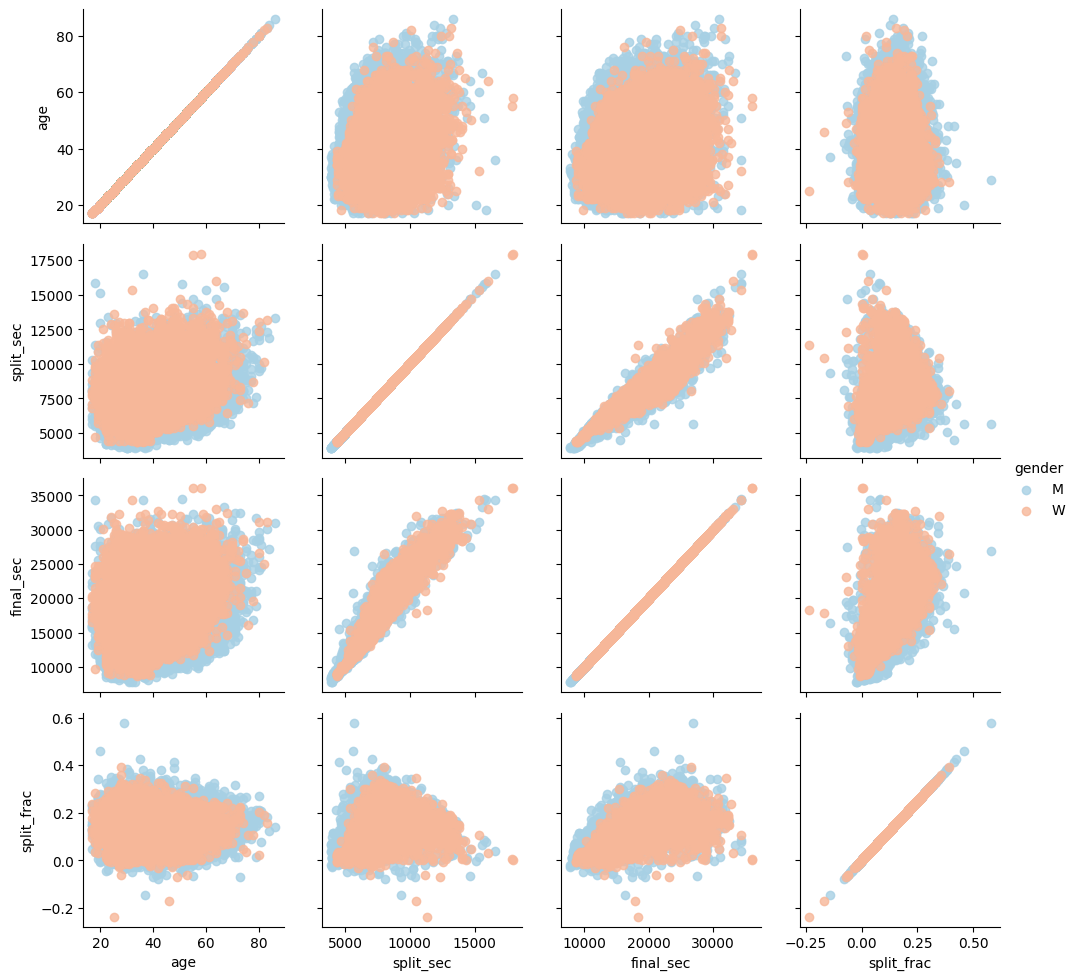

In [90]:
g = sns.PairGrid(data, vars=['age','split_sec','final_sec','split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [91]:
data['age_dec'] = data.age.map(lambda age : 10*(age//10)) # 10살 단위로
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


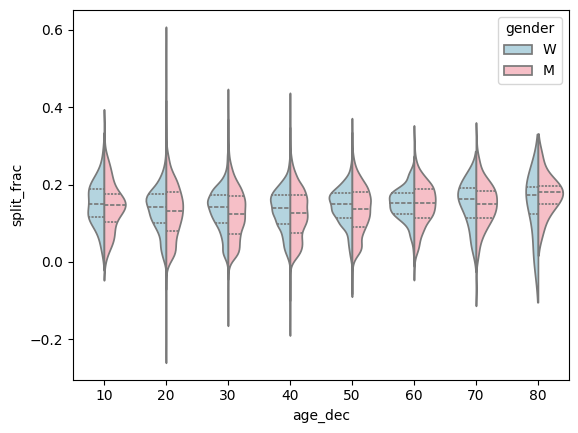

In [92]:
men = (data.gender=="M")
women = (data.gender=="W")

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec",y="split_frac",hue="gender",data=data,
                  split=True,inner="quartile",
                  palette=["lightblue","lightpink"]);

## p.302- 다중 서브플롯

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

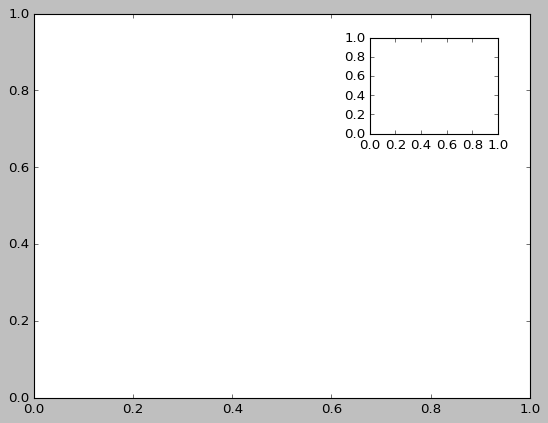

In [102]:
ax1 = plt.axes() # 표준축
ax2 = plt.axes([0.65,0.65,0.2,0.2]) # [x시작위치,y시작위치,x너비,y너비]

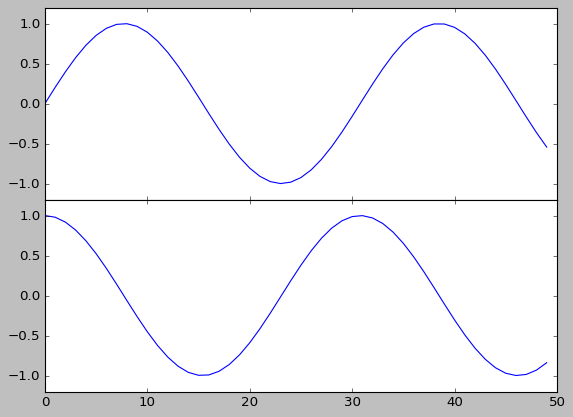

In [106]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4],
                  xticklabels=[],ylim=(-1.2,1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4],
                  ylim=(-1.2,1.2))

x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

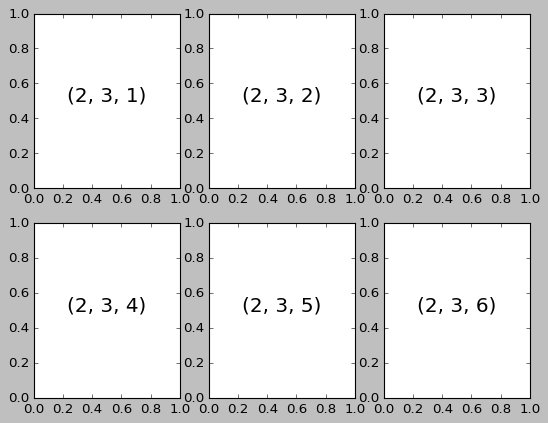

In [111]:
# plt.subplot : 그리드 안에 하나의 서브플롯을 만듦
# subplot(행 개수, 열 개수, 인덱스)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

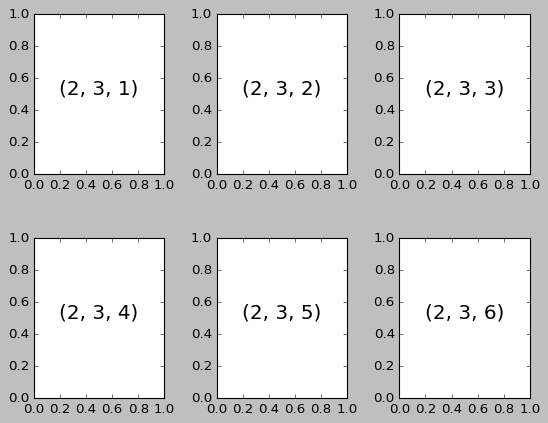

In [114]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # 간격조정
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)), fontsize=18, ha="center")

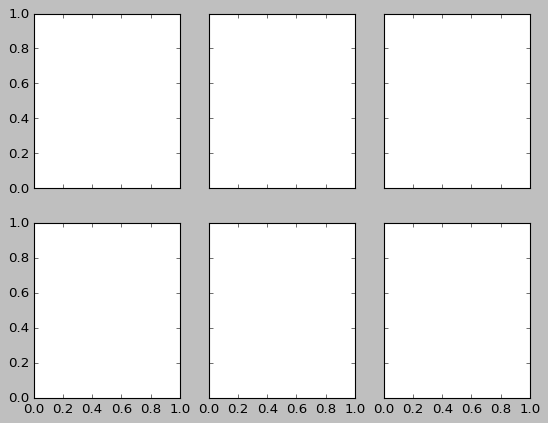

In [115]:
# plt.subplots : 한번에 전체 그리드를 만듦
fig, ax = plt.subplots(2,3,sharex="col", sharey="row") # x축,y축을 서로 공유

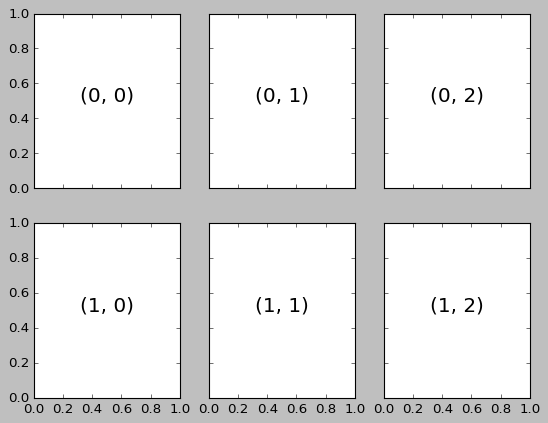

In [116]:
# 축이 2차원 배열 -> 인덱싱가능
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),
        fontsize=18, ha="center")
fig

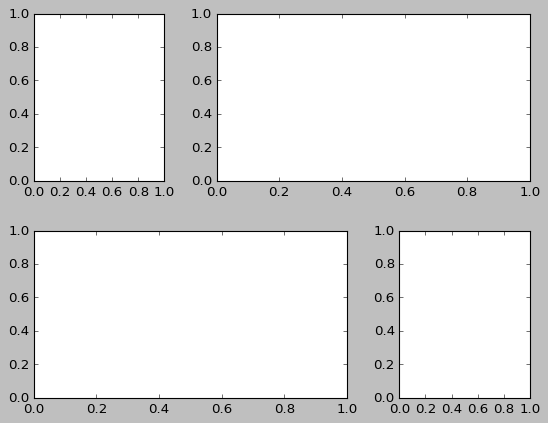

In [120]:
# plt.GridSpec : 복잡한 배치 가능
grid = plt.GridSpec(2,3,wspace=0.4,hspace=0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);